# Exercise 02 : Bar

## Import

In [1]:
import pandas as pd
import sqlite3

## Connect to database

In [2]:
db_connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get all commit datetimes from `checker` table

In [3]:
sql_query = """
SELECT
    timestamp as datetime
FROM
    checker
WHERE
    uid LIKE 'user_%'
"""

commits_datetimes_df = pd.read_sql(sql=sql_query, con=db_connect, parse_dates=['datetime'])
commits_datetimes_df['date'] = commits_datetimes_df.datetime.dt.date
commits_datetimes_df['hour'] = commits_datetimes_df.datetime.dt.hour
commits_datetimes_df.head()

,datetime,date,hour
0,2020-04-17 05:19:02.744528,2020-04-17,5
1,2020-04-17 05:22:35.249331,2020-04-17,5
2,2020-04-17 05:22:45.549397,2020-04-17,5
3,2020-04-17 05:34:14.691200,2020-04-17,5
4,2020-04-17 05:34:24.422370,2020-04-17,5


In [4]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
 1   date      3207 non-null   object        
 2   hour      3207 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 75.3+ KB


In [5]:
commits_datetimes_df['daytime'] = pd.cut(commits_datetimes_df.hour, bins=[0, 4, 10, 17, 24], labels=['night', 'morning', 'afternoon', 'evening'], include_lowest=True)
commits_datetimes_df.head()

,datetime,date,hour,daytime
0,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,2020-04-17 05:34:24.422370,2020-04-17,5,morning


In [6]:
commits_group = commits_datetimes_df.groupby('daytime').date.value_counts().unstack(0)
commits_group.fillna(0, inplace=True)
commits_group

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0.0,13.0,10.0,0.0
2020-04-18,0.0,1.0,40.0,28.0
2020-04-19,2.0,11.0,9.0,11.0
2020-04-20,0.0,0.0,15.0,10.0
2020-04-21,0.0,0.0,9.0,16.0
2020-04-22,0.0,0.0,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,0.0,2.0,12.0,2.0
2020-04-25,1.0,21.0,48.0,34.0


## Create a graph

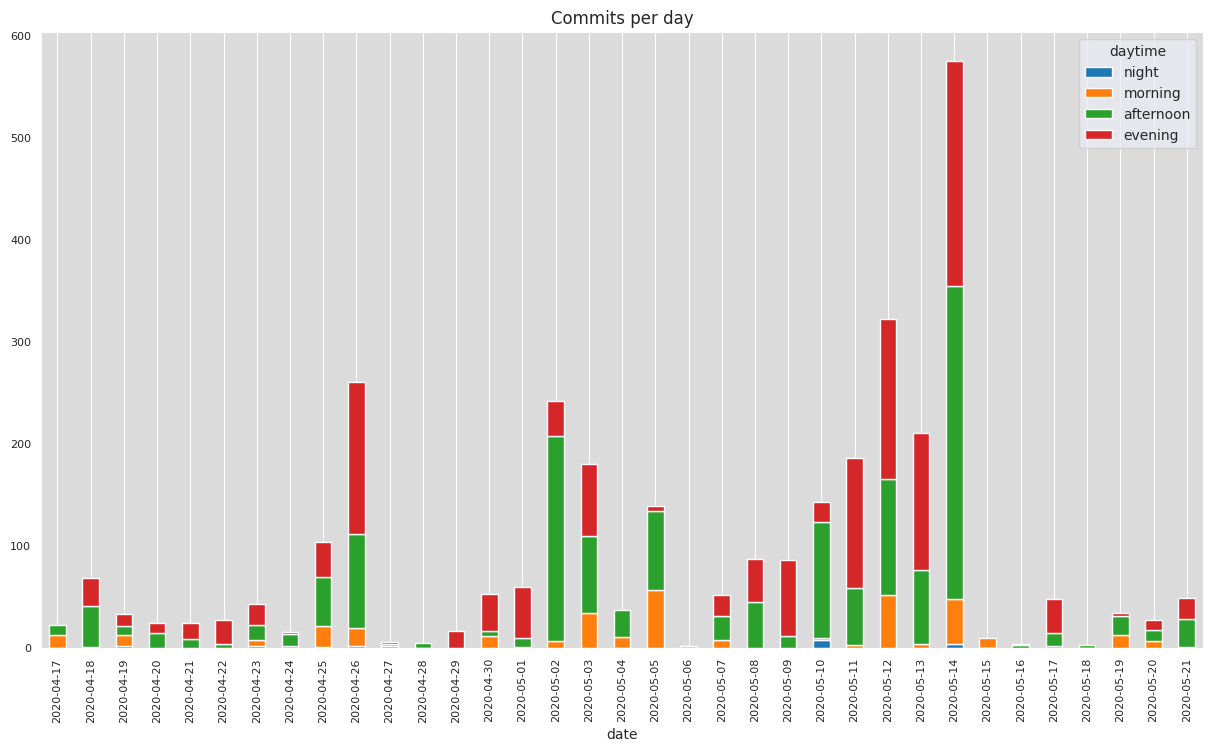

In [7]:
ax = commits_group.plot(kind='bar', stacked=True, figsize=(15, 8), title='Commits per day', fontsize=8, rot=90,)
ax.set_facecolor('#dbdbdb')
ax.grid(axis='y')

In [8]:
commits_group.sum()

daytime
night          21.0
morning       344.0
afternoon    1473.0
evening      1369.0
dtype: float64

## “When do our users usually commit the labs: in the night, morning, afternoon, or evening?

### Afternoon and Evening

In [9]:
commits_group.loc[commits_group['evening'] > commits_group['afternoon']].sum(axis=1).idxmax()

datetime.date(2020, 5, 12)

## Which day has:
 * The most number of commits
 * And at the same time, the number of commits in the evening is higher than in the afternoon?

### The anwser is: 2020-05-12

## Close the connection to the database

In [10]:
db_connect.close()